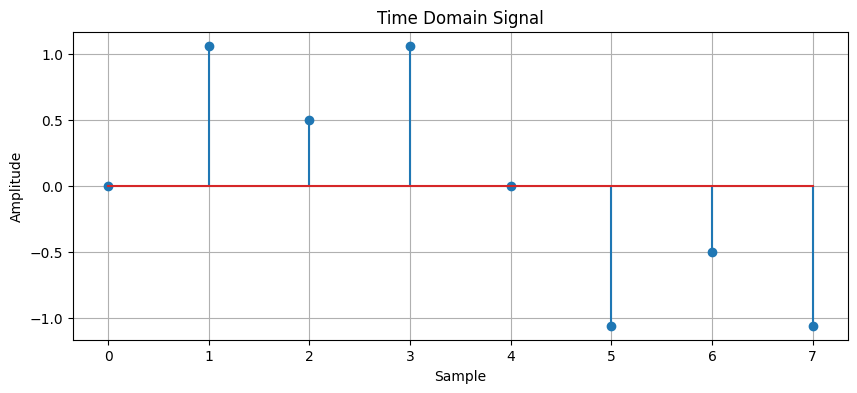

DFT (manual implementation):
X[0] = (2.220446049250313e-16+0j)
X[1] = (5.551115123125783e-16-4j)
X[2] = (3.436046270611184e-16+2.220446049250313e-16j)
X[3] = (1.1102230246251565e-16-2.0000000000000013j)
X[4] = (6.661338147750939e-16+7.942179076531218e-16j)
X[5] = (-1.887379141862766e-15+2.0000000000000027j)
X[6] = (4.072943840650129e-15+2.220446049250313e-16j)
X[7] = (-4.6629367034256575e-15+3.999999999999999j)

DFT (NumPy FFT):
X[0] = (-1.3792751006322435e-16+0j)
X[1] = (-3.0616169978683826e-16-4j)
X[2] = (3.0616169978683826e-16+0j)
X[3] = (-3.0616169978683826e-16-2.0000000000000004j)
X[4] = (7.502509096369009e-16+0j)
X[5] = (-3.0616169978683826e-16+2.0000000000000004j)
X[6] = (3.0616169978683826e-16+0j)
X[7] = (-3.0616169978683826e-16+4j)


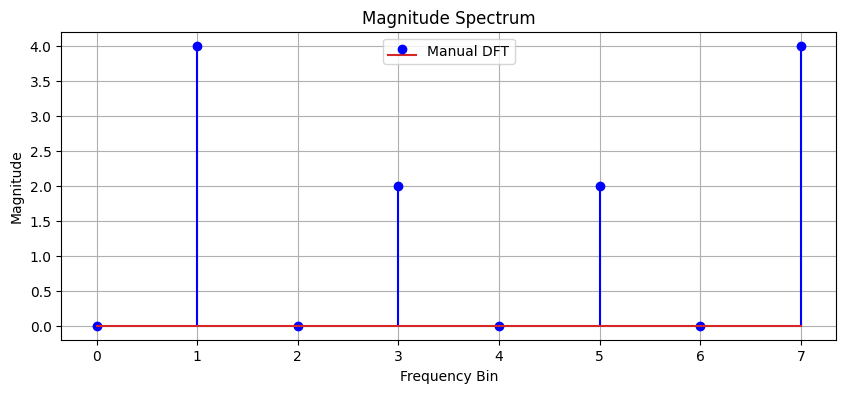

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 8  # Number of samples
t = np.arange(N)  # Time indices

# Create a signal with two frequencies
signal = 1 * np.sin(2 * np.pi * 1 * t / N) + 0.5 * np.sin(2 * np.pi * 3 * t / N)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.stem(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# DFT implementation
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Compute DFT
X_manual = dft(signal)

# Compute FFT using NumPy
X_numpy = np.fft.fft(signal)

# Display the results
print("DFT (manual implementation):")
for k in range(N):
    print(f"X[{k}] = {X_manual[k]}")

print("\nDFT (NumPy FFT):")
for k in range(N):
    print(f"X[{k}] = {X_numpy[k]}")

# Compute the magnitude spectrum
magnitude_manual = np.abs(X_manual)
magnitude_numpy = np.abs(X_numpy)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.stem(t, magnitude_manual, 'b', markerfmt="bo", label='Manual DFT')
#plt.stem(t, magnitude_numpy, 'r', markerfmt="ro", label='NumPy FFT', linefmt='r--')
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()



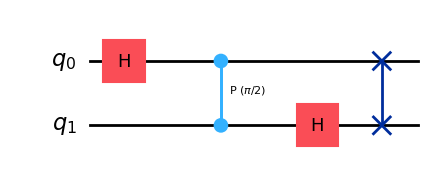

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import numpy as np

# Function to create QFT circuit
def qft_circuit(n):
    qc = QuantumCircuit(n)
    
    # Apply QFT
    for j in range(n):
        qc.h(j)
        for k in range(j+1, n):
            qc.cp(np.pi / 2**(k-j), j, k)
    
    # Swap qubits for QFT order
    for j in range(n//2):
        qc.swap(j, n-j-1)
    
    return qc

# Create a QFT circuit for 2 qubits
n = 2
qc1 = qft_circuit(n)
qc1.draw('mpl')

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import numpy as np

# Function to create QFT circuit
def qft_circuit(n):
    qc = QuantumCircuit(n)
    
    # Apply QFT
    for j in range(n):
        qc.h(j)
        for k in range(j+1, n):
            qc.cp(np.pi / 2**(k-j), j, k)
    
    # Swap qubits for QFT order
    for j in range(n//2):
        qc.swap(j, n-j-1)
    
    return qc

# Initialize the quantum circuit with an initial state
initial_state = [1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)] 
#initial_state = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]  # Example initial state
n = 3

# Create a quantum circuit with the initial state
qc_init = QuantumCircuit(n)
qc_init.initialize(initial_state, [0, 1,2])
qc_init.compose(qft_circuit(n), qubits=[0, 1,2], inplace=True)  # Using compose method
# Measure all qubits
qc_init.measure_all()


simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc_init, shots=100)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts(qc_init))

# Visualize the circuit
print(qc_init)

# Visualize the measurement outcomes
plot_histogram(result.get_counts(qc_init))

#statevector = Statevector(qc_init)
# Print the state vector
print("State Vector:")
#print(statevector)

# Visualize the state vector
#plot_state_city(statevector)

{'100': 29, '111': 18, '010': 10, '000': 21, '011': 14, '110': 6, '101': 2}
        ┌──────────────────────────────────────────┐┌───┐                  »
   q_0: ┤0                                         ├┤ H ├─■────────■───────»
        │                                          │└───┘ │P(π/2)  │       »
   q_1: ┤1 Initialize(0.70711,0,0,0,0,0,0,0.70711) ├──────■────────┼───────»
        │                                          │               │P(π/4) »
   q_2: ┤2                                         ├───────────────■───────»
        └──────────────────────────────────────────┘                       »
meas: 3/═══════════════════════════════════════════════════════════════════»
                                                                           »
«                               ░ ┌─┐      
«   q_0: ────────────────────X──░─┤M├──────
«        ┌───┐               │  ░ └╥┘┌─┐   
«   q_1: ┤ H ├─■─────────────┼──░──╫─┤M├───
«        └───┘ │P(π/2) ┌───┐ │  ░  ║ └╥┘┌─┐
«   q_2: ──

In [29]:
qc = QuantumCircuit(3)

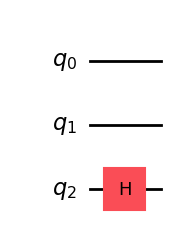

In [30]:
qc.h(2)
qc.draw('mpl')

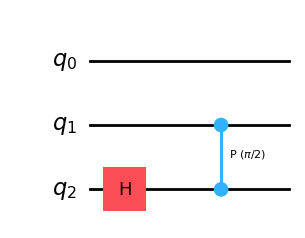

In [15]:
qc.cp(np.pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw('mpl')

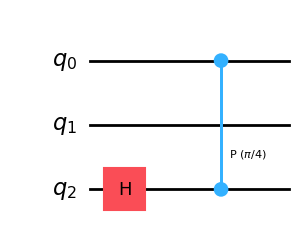

In [31]:
qc.cp(np.pi/4, 0, 2) # CROT from qubit 0 to qubit 2
qc.draw('mpl')

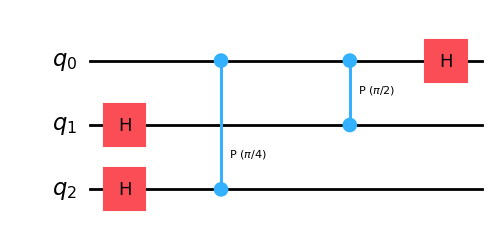

In [32]:
qc.h(1)
qc.cp(np.pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw('mpl')

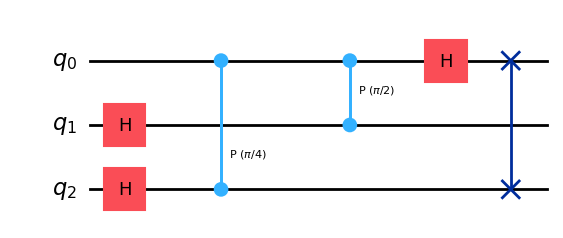

In [33]:
qc.swap(0,2)
qc.draw('mpl')

In [34]:
from qiskit.visualization import array_to_latex
simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()


statevector = Statevector(qc)

#statevector = Statevector(qc_init)
# Print the state vector
print("State Vector:")
print(statevector)
statevector.draw("latex")


State Vector:
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

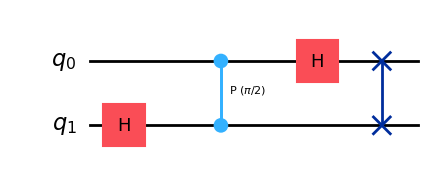

In [35]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cp(np.pi/2, 0, 1)
qc.h(0)
qc.swap(0,1)
qc.draw('mpl')

In [36]:
simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()


statevector = Statevector(qc)

#statevector = Statevector(qc_init)
# Print the state vector
print("State Vector:")
print(statevector)
statevector.draw("latex")

State Vector:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

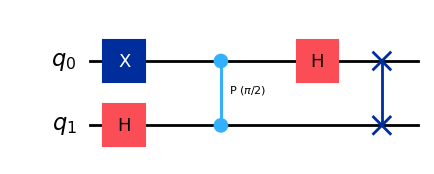

In [37]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.cp(np.pi/2, 0, 1)
qc.h(0)
qc.swap(0,1)
qc.draw('mpl')

In [38]:
simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()


statevector = Statevector(qc)

#statevector = Statevector(qc_init)
# Print the state vector
print("State Vector:")
print(statevector)
statevector.draw("latex")

State Vector:
Statevector([ 5.000000e-01+0.j ,  3.061617e-17+0.5j, -5.000000e-01+0.j ,
             -3.061617e-17-0.5j],
            dims=(2, 2))


<IPython.core.display.Latex object>

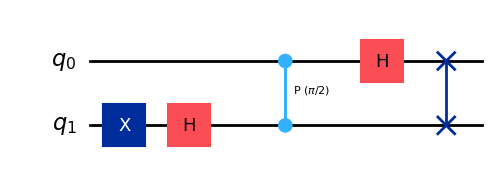

In [40]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(1)
qc.cp(np.pi/2, 0, 1)
qc.h(0)
qc.swap(0,1)
qc.draw('mpl')

In [41]:
simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()


statevector = Statevector(qc)

#statevector = Statevector(qc_init)
# Print the state vector
print("State Vector:")
print(statevector)
statevector.draw("latex")

State Vector:
Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

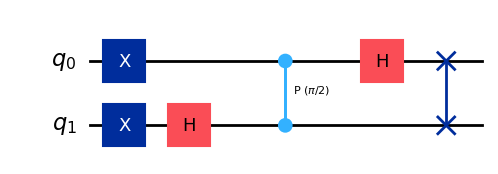

In [42]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.h(1)
qc.cp(np.pi/2, 0, 1)
qc.h(0)
qc.swap(0,1)
qc.draw('mpl')

In [43]:
simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()


statevector = Statevector(qc)

#statevector = Statevector(qc_init)
# Print the state vector
print("State Vector:")
print(statevector)
statevector.draw("latex")

State Vector:
Statevector([ 5.000000e-01+0.j , -3.061617e-17-0.5j, -5.000000e-01+0.j ,
              3.061617e-17+0.5j],
            dims=(2, 2))


<IPython.core.display.Latex object>